In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler


## With Near Miss Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.drop(['Income',"Education",'DiffWalk',"NoDocbcCost","AnyHealthcare",'Veggies',"Fruits","CholCheck"],axis=1,inplace=True)



In [4]:
df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [6]:
x = df.drop(["HeartDiseaseorAttack"] , axis = 1).values
y = df["HeartDiseaseorAttack"].values

In [7]:
nr = NearMiss()
x_NM, y_NM = nr.fit_resample(x, y)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_NM, y_NM, test_size=0.25, random_state=42)

In [8]:
scaler = MinMaxScaler()
x_train5 = scaler.fit_transform(x_train5)
x_test5 = scaler.transform(x_test5)
print(len(x_train5), len(y_train5))
print(len(x_test5), len(y_test5))

32131 32131
10711 10711


## Random Forest

In [9]:



# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train5, y_train5)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train5)
ypred_test = best_rf.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train))
print("Test Results\n")
print(classification_report(y_test5, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test5, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(best_rf, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.78     16021
         1.0       0.82      0.68      0.74     16110

    accuracy                           0.76     32131
   macro avg       0.77      0.77      0.76     32131
weighted avg       0.77      0.76      0.76     32131

Test Results

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78      5400
         1.0       0.81      0.67      0.73      5311

    accuracy                           0.76     10711
   macro avg       0.76      0.76      0.75     10711
weighted avg       0.76      0.76      0.75     10711

Confusion Matrix:
 [[4560  840]
 [1765 3546]]


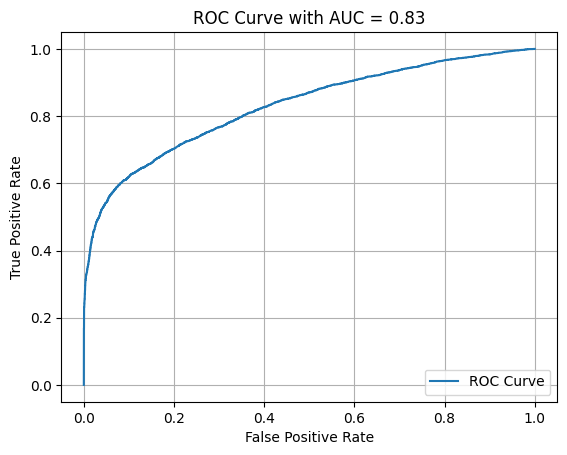

In [10]:


y_proba_test = best_rf.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train5, y_train5)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train5, y_train5)

ypred_train2 = best_tree.predict(x_train5)
ypred_test2 = best_tree.predict(x_test5)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train5, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test5, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train5, y_train5, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Najlepsza dokładność: 0.7488405856265712
Training Results

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78     16021
         1.0       0.84      0.64      0.73     16110

    accuracy                           0.76     32131
   macro avg       0.77      0.76      0.75     32131
weighted avg       0.77      0.76      0.75     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.71      0.88      0.78      5400
         1.0       0.83      0.63      0.72      5311

    accuracy                           0.76     10711
   macro avg       0.77      0.75      0.75     10711
weighted avg       0.77      0.76      0.75     10711



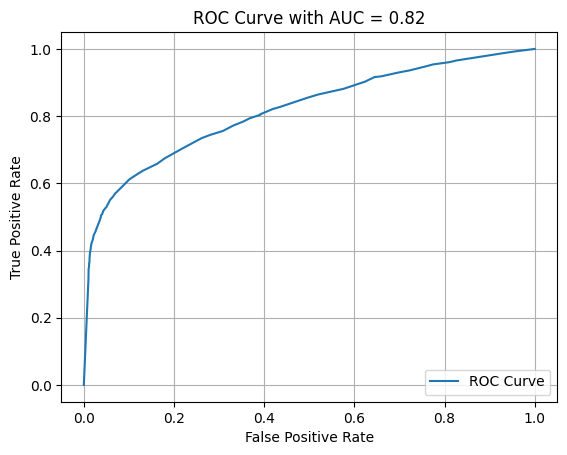

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = best_tree.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train5, y_train5)
ypred_train3 = Gnb.predict(x_train5)
y_pred_test3 = Gnb.predict(x_test5)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test5, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.6813556157221548


In [14]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train3))

Training Results

              precision    recall  f1-score   support

         0.0       0.63      0.84      0.72     16021
         1.0       0.76      0.51      0.61     16110

    accuracy                           0.68     32131
   macro avg       0.70      0.68      0.67     32131
weighted avg       0.70      0.68      0.67     32131



In [15]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.73      5400
         1.0       0.76      0.52      0.62      5311

    accuracy                           0.68     10711
   macro avg       0.70      0.68      0.67     10711
weighted avg       0.70      0.68      0.67     10711



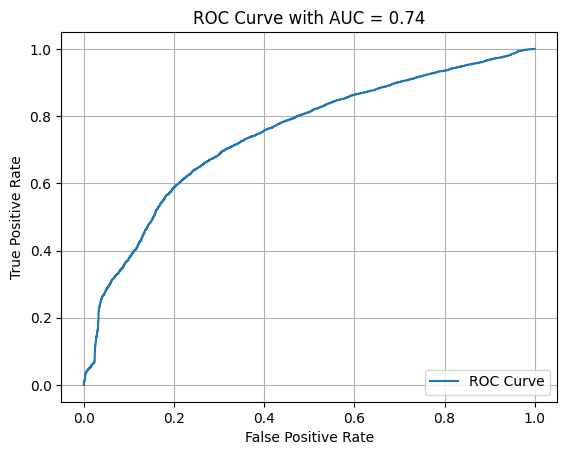

In [16]:
# cross_val_scores = cross_val_score(Gnb, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = Gnb.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy on Training set:  0.7763530546823939
Accuracy on Test set:  0.766221641303333

Training Results

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80     16021
         1.0       0.86      0.66      0.75     16110

    accuracy                           0.78     32131
   macro avg       0.79      0.78      0.77     32131
weighted avg       0.79      0.78      0.77     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79      5400
         1.0       0.84      0.65      0.73      5311

    accuracy                           0.77     10711
   macro avg       0.78      0.77      0.76     10711
weighted avg       0.78      0.77      0.76     10711



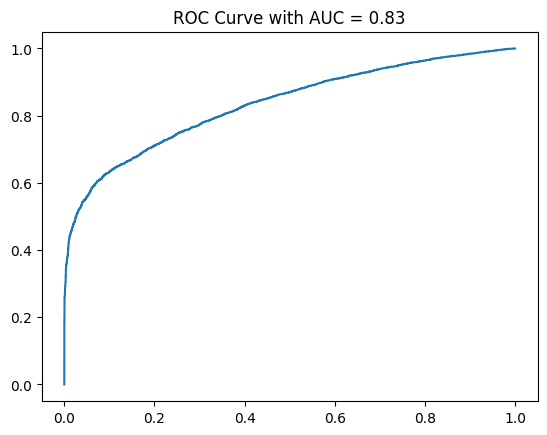

In [17]:

xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train5)
y_pred_test4 = best_xg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## logistic regression


Najlepsze parametry:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.6996981108586723
Accuracy on Test set:  0.7028288675193726

Training Results

              precision    recall  f1-score   support

         0.0       0.66      0.80      0.73     16021
         1.0       0.75      0.60      0.67     16110

    accuracy                           0.70     32131
   macro avg       0.71      0.70      0.70     32131
weighted avg       0.71      0.70      0.70     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73      5400
         1.0       0.75      0.59      0.66      5311

    accuracy                           0.70     10711
   macro avg       0.71      0.70      0.70     10711
weighted avg       0.71      0.70      0.70     10711



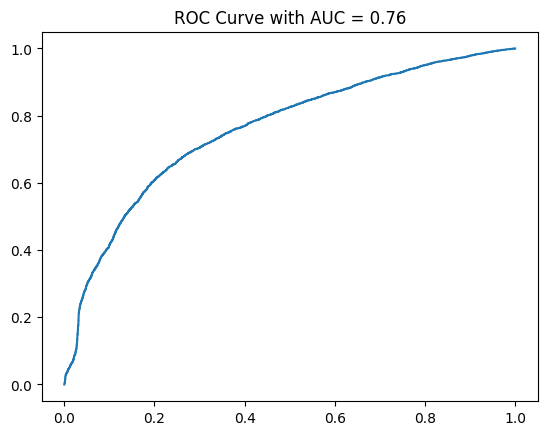

In [18]:


# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train5)
y_pred_test4 = best_lg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Najlepsze parametry:  {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Training set:  0.7732719180853381
Accuracy on Test set:  0.7644477639809542

Training Results

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.80     16021
         1.0       0.85      0.66      0.75     16110

    accuracy                           0.77     32131
   macro avg       0.79      0.77      0.77     32131
weighted avg       0.79      0.77      0.77     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79      5400
         1.0       0.83      0.66      0.73      5311

    accuracy                           0.76     10711
   macro avg       0.78      0.76      0.76     10711
weighted avg       0.78      0.76      0.76     10711



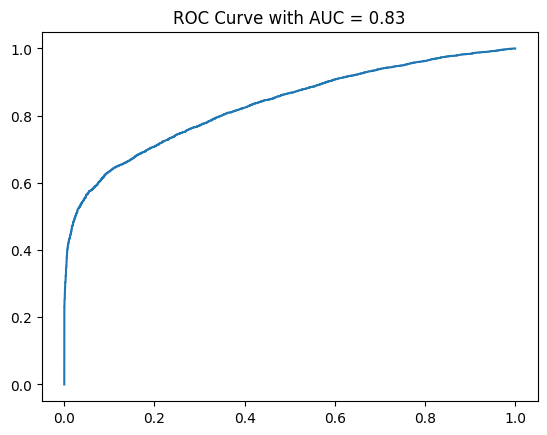

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train5)
y_pred_test6 = best_gb.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train5, y_train5)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train5, 
            y_train5)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.6368103929493428

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=29)

In [25]:
ypred_train7 = grid_cv.predict(x_train5)
y_pred_test7 = grid_cv.predict(x_test5)
print("XGBClassifier Accuracy: ",accuracy_score(y_test5, y_pred_test7))

XGBClassifier Accuracy:  0.6963868919802073


In [26]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train7))

Training Results

              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     16021
         1.0       0.80      0.56      0.66     16110

    accuracy                           0.71     32131
   macro avg       0.73      0.71      0.71     32131
weighted avg       0.73      0.71      0.71     32131



In [27]:
print("Training Results\n")
print(classification_report(y_test5, y_pred_test7))

Training Results

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.74      5400
         1.0       0.78      0.54      0.64      5311

    accuracy                           0.70     10711
   macro avg       0.72      0.70      0.69     10711
weighted avg       0.72      0.70      0.69     10711



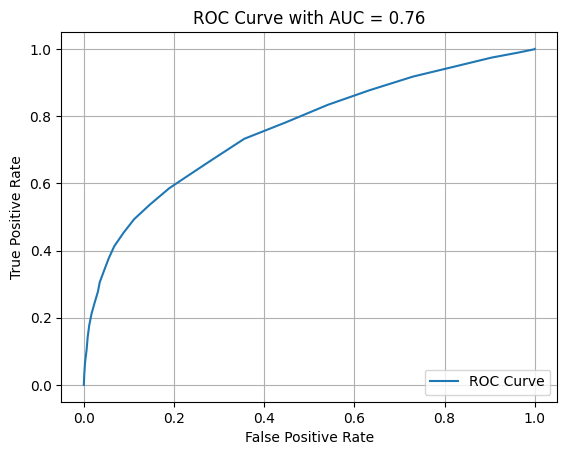

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = grid_cv.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train5, y_train5, batch_size = 32, epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


1005/1005 [==============================] - 4s 3ms/step - loss: 0.6306 - accuracy: 0.6433 - val_loss: 0.5864 - val_accuracy: 0.7117
Epoch 2/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5797 - accuracy: 0.7126 - val_loss: 0.5690 - val_accuracy: 0.7243
Epoch 3/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5622 - accuracy: 0.7267 - val_loss: 0.5500 - val_accuracy: 0.7315
Epoch 4/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5458 - accuracy: 0.7318 - val_loss: 0.5346 - val_accuracy: 0.7383
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7381 - val_loss: 0.5280 - val_accuracy: 0.7420
Epoch 6/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5297 - accuracy: 0.7389 - val_loss: 0.5247 - val_accuracy: 0.7409
Epoch 7/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5258 - accuracy: 0.7416 - val_loss: 0.5230 - val_

In [36]:
ypred_train8 = ann.predict(x_train5)
y_pred_test8 = ann.predict(x_test5)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test5.reshape(len(y_test5),1)),1))

335/335 [==============================] - 0s 1ms/step
[[1. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [37]:
accuracy_score(y_test5, y_pred_test8)

0.7642610400522827

In [38]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train8))

Training Results

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78     16021
         1.0       0.83      0.66      0.73     16110

    accuracy                           0.76     32131
   macro avg       0.77      0.76      0.76     32131
weighted avg       0.77      0.76      0.76     32131



In [39]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79      5400
         1.0       0.83      0.66      0.73      5311

    accuracy                           0.76     10711
   macro avg       0.78      0.76      0.76     10711
weighted avg       0.78      0.76      0.76     10711



335/335 [==============================] - 0s 1ms/step


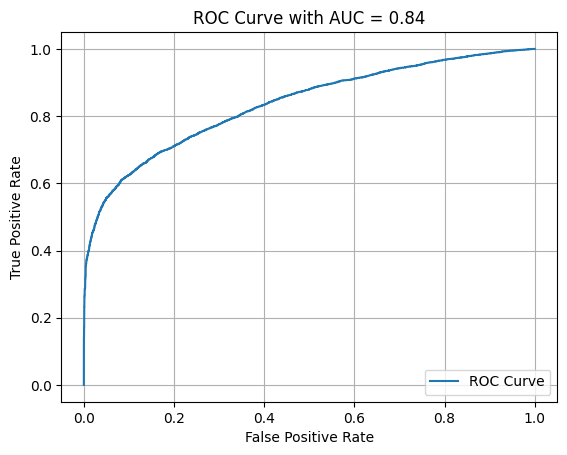

In [40]:
# cross_val_scores = cross_val_score(ann, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
1005/1005 [==============================] - 3s 2ms/step - loss: 0.6233 - accuracy: 0.6660
Epoch 2/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5665 - accuracy: 0.7263
Epoch 3/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7327
Epoch 4/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7368
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7394
Epoch 6/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5249 - accuracy: 0.7378
Epoch 7/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5227 - accuracy: 0.7382
Epoch 8/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5206 - accuracy: 0.7404
Epoch 9/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5193 - accuracy: 0.7407
Epoch 10/100
1005/1005 [==============================] - 2s 2ms/step - l

In [42]:
model_2.evaluate(x_test5,y_test5)

335/335 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.7581


[0.48499205708503723, 0.7580991387367249]

335/335 [==============================] - 1s 2ms/step


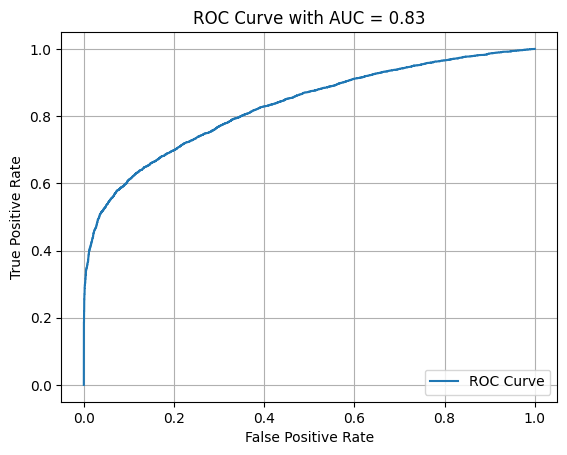

In [43]:
# cross_val_scores = cross_val_score(model_2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [44]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model1.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1005/1005 [==============================] - 3s 2ms/step - loss: 0.6666 - val_loss: 0.6144
Epoch 2/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.6296 - val_loss: 0.5919
Epoch 3/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.6132 - val_loss: 0.5806
Epoch 4/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.6063 - val_loss: 0.5722
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5946 - val_loss: 0.5616
Epoch 6/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5854 - val_loss: 0.5532
Epoch 7/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5803 - val_loss: 0.5432
Epoch 8/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5743 - val_loss: 0.5391
Epoch 9/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5684 - val_loss: 0.5374
Epoch 10/100
1005/1005 [==============================] - 2s 2ms/step - l

In [46]:
ypred_train13 = model1.predict(x_train5)
y_pred_test13 = model1.predict(x_test5)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print(classification_report(y_train5,ypred_train13))
print(classification_report(y_test5,y_pred_test13))

335/335 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77     16021
         1.0       0.81      0.64      0.72     16110

    accuracy                           0.75     32131
   macro avg       0.76      0.75      0.74     32131
weighted avg       0.76      0.75      0.74     32131

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78      5400
         1.0       0.82      0.64      0.72      5311

    accuracy                           0.75     10711
   macro avg       0.76      0.75      0.75     10711
weighted avg       0.76      0.75      0.75     10711



335/335 [==============================] - 1s 2ms/step


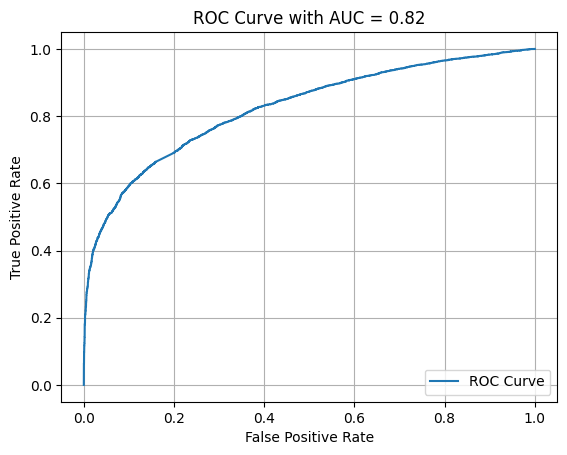

In [47]:
# cross_val_scores = cross_val_score(model1, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model1.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [48]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
1005/1005 [==============================] - 3s 2ms/step - loss: 0.5937 - accuracy: 0.6962
Epoch 2/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7297
Epoch 3/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5315 - accuracy: 0.7342
Epoch 4/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5242 - accuracy: 0.7373
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5205 - accuracy: 0.7402
Epoch 6/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5167 - accuracy: 0.7412
Epoch 7/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5144 - accuracy: 0.7413
Epoch 8/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5103 - accuracy: 0.7444
Epoch 9/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5084 - accuracy: 0.7438
Epoch 10/100
1005/1005 [==============================] - 3s 3ms/step - l

In [49]:
model_22.evaluate(x_test5,y_test5)

335/335 [==============================] - 1s 2ms/step - loss: 0.4745 - accuracy: 0.7646


[0.47454845905303955, 0.7646344900131226]

In [50]:
ypred_train22 = model_22.predict(x_train5)
y_pred_test22 = model_22.predict(x_test5)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train5,ypred_train22))
print(classification_report(y_test5,y_pred_test22))

335/335 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.80     16021
         1.0       0.85      0.66      0.75     16110

    accuracy                           0.77     32131
   macro avg       0.79      0.77      0.77     32131
weighted avg       0.79      0.77      0.77     32131

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79      5400
         1.0       0.84      0.65      0.73      5311

    accuracy                           0.76     10711
   macro avg       0.78      0.76      0.76     10711
weighted avg       0.78      0.76      0.76     10711



335/335 [==============================] - 1s 2ms/step


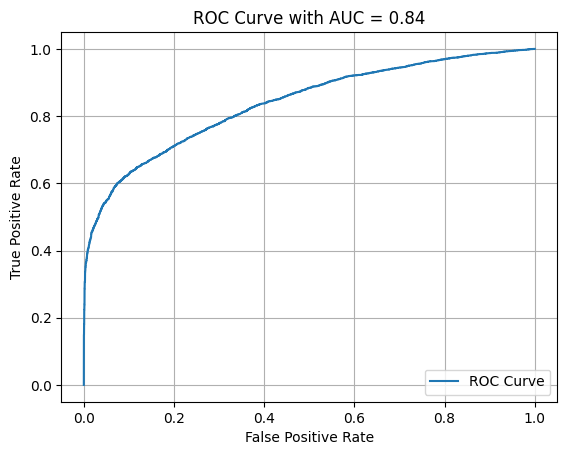

In [51]:
# cross_val_scores = cross_val_score(model_22, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_22.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [52]:
model2 = Sequential()


model2.add(Dense(14,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model2.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1005/1005 [==============================] - 4s 3ms/step - loss: 0.6452 - val_loss: 0.5948
Epoch 2/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.6082 - val_loss: 0.5793
Epoch 3/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.5932 - val_loss: 0.5664
Epoch 4/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5808 - val_loss: 0.5553
Epoch 5/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5717 - val_loss: 0.5462
Epoch 6/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5647 - val_loss: 0.5442
Epoch 7/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5597 - val_loss: 0.5353
Epoch 8/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5567 - val_loss: 0.5315
Epoch 9/100
1005/1005 [==============================] - 2s 2ms/step - loss: 0.5519 - val_loss: 0.5306
Epoch 10/100
1005/1005 [==============================] - 2s 2ms/step - l

In [54]:
ypred_train14 = model2.predict(x_train5)
y_pred_test14 = model2.predict(x_test5)

y_pred_test14 = (y_pred_test14 > 0.5)
ypred_train14 = (ypred_train14 > 0.5)

print("Training Results\n")
print(classification_report(y_train5,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5,y_pred_test14))

335/335 [==============================] - 0s 1ms/step
Training Results

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77     16021
         1.0       0.81      0.65      0.72     16110

    accuracy                           0.75     32131
   macro avg       0.76      0.75      0.75     32131
weighted avg       0.76      0.75      0.74     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77      5400
         1.0       0.81      0.65      0.72      5311

    accuracy                           0.75     10711
   macro avg       0.76      0.75      0.75     10711
weighted avg       0.76      0.75      0.75     10711



335/335 [==============================] - 1s 1ms/step


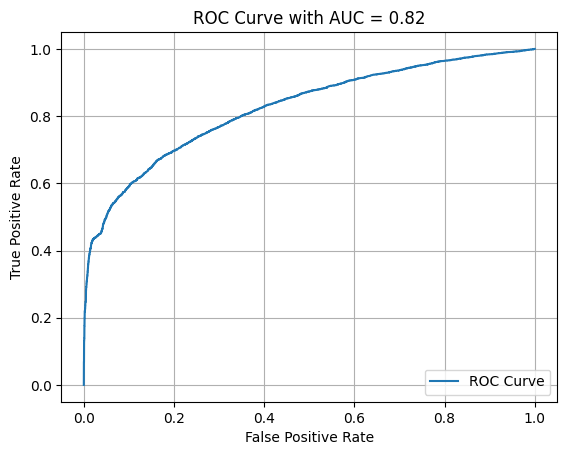

In [55]:
# cross_val_scores = cross_val_score(model2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [56]:
model = SVC(probability=True)

In [57]:
model.fit(x_train5,y_train5)

SVC(probability=True)

In [58]:


ypred_train = model.predict(x_train5)
y_pred_test = model.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76     16021
         1.0       0.80      0.64      0.71     16110

    accuracy                           0.74     32131
   macro avg       0.75      0.74      0.73     32131
weighted avg       0.75      0.74      0.73     32131

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76      5400
         1.0       0.80      0.63      0.70      5311

    accuracy                           0.74     10711
   macro avg       0.75      0.74      0.73     10711
weighted avg       0.75      0.74      0.73     10711



In [59]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [60]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [61]:
grid.fit(x_train5,y_train5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.710 total time=  31.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.712 total time=  31.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.710 total time=  31.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=  31.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=  31.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=  33.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.685 total time=  33.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=  33.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=  30.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=  30.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=  34.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [64]:
ypred_train = grid.predict(x_train5)
y_pred_test = grid.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79     16021
         1.0       0.86      0.63      0.73     16110

    accuracy                           0.76     32131
   macro avg       0.79      0.76      0.76     32131
weighted avg       0.79      0.76      0.76     32131

              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79      5400
         1.0       0.86      0.61      0.71      5311

    accuracy                           0.76     10711
   macro avg       0.78      0.76      0.75     10711
weighted avg       0.78      0.76      0.75     10711



Training Results

              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79     16021
         1.0       0.86      0.63      0.73     16110

    accuracy                           0.76     32131
   macro avg       0.79      0.76      0.76     32131
weighted avg       0.79      0.76      0.76     32131

Testing Results

              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79      5400
         1.0       0.86      0.61      0.71      5311

    accuracy                           0.76     10711
   macro avg       0.78      0.76      0.75     10711
weighted avg       0.78      0.76      0.75     10711



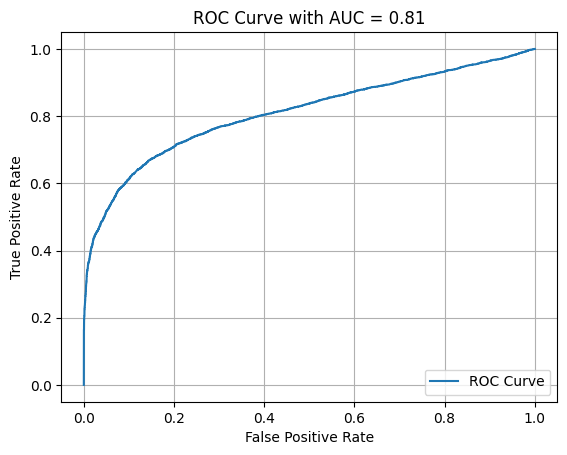

In [65]:
model3 = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
model3.fit(x_train5, y_train5)

ypred_train14 = model3.predict(x_train5)
y_pred_test14 = model3.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()